In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


In [5]:
display(x_train[:1])
print(y_train[:1])

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

[[6]]


In [6]:
NUM_CLASSES = 10

x_train = x_train.astype("float32") / 255.0 
# x_train) is stored in a tensor of shape [50000, 32, 32, 3]
# The first dimension of this tensor references 
# the index of the image in the dataset, the second and
# third relate to the size of the image, and the last is the channel 

x_test = x_test.astype("float32") / 255.0

# One-hot encode the labels
# y_train and y_test have shapes [50000, 1] and [10000, 1] to
# [50000, 10] and [10000, 10]
y_train = utils.to_categorical(y_train, NUM_CLASSES) 
y_test = utils.to_categorical(y_test, NUM_CLASSES)

display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


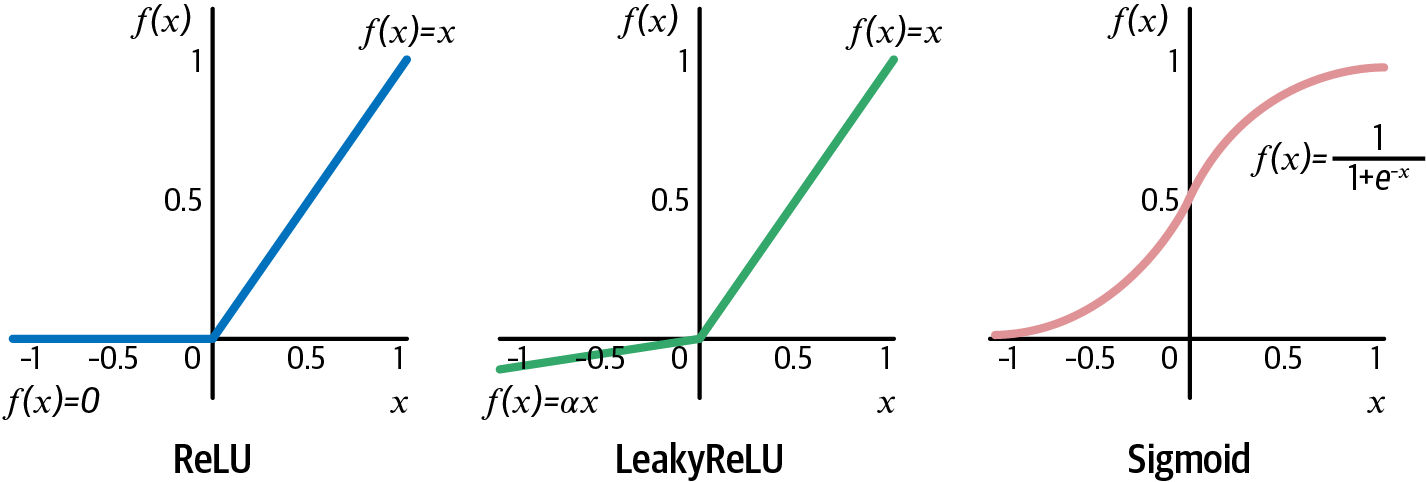

The softmax activation function is a mathematical function that transforms a vector of real numbers into a vector of probabilities that sum up to one.

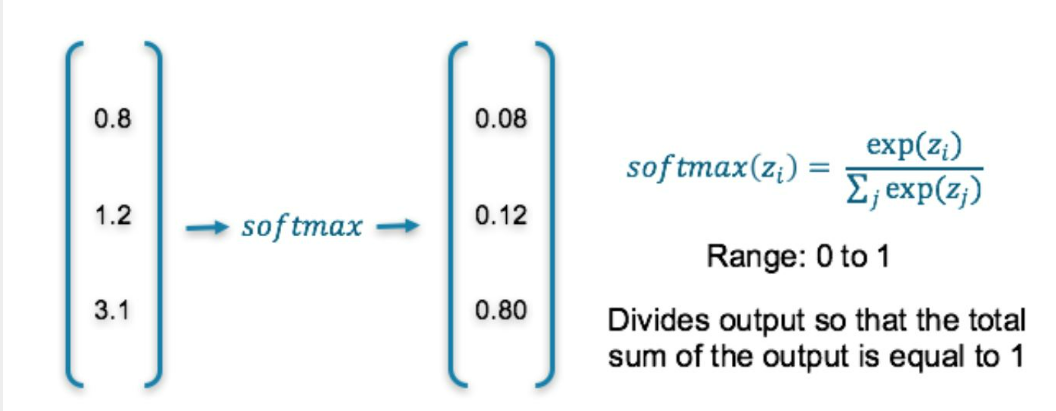


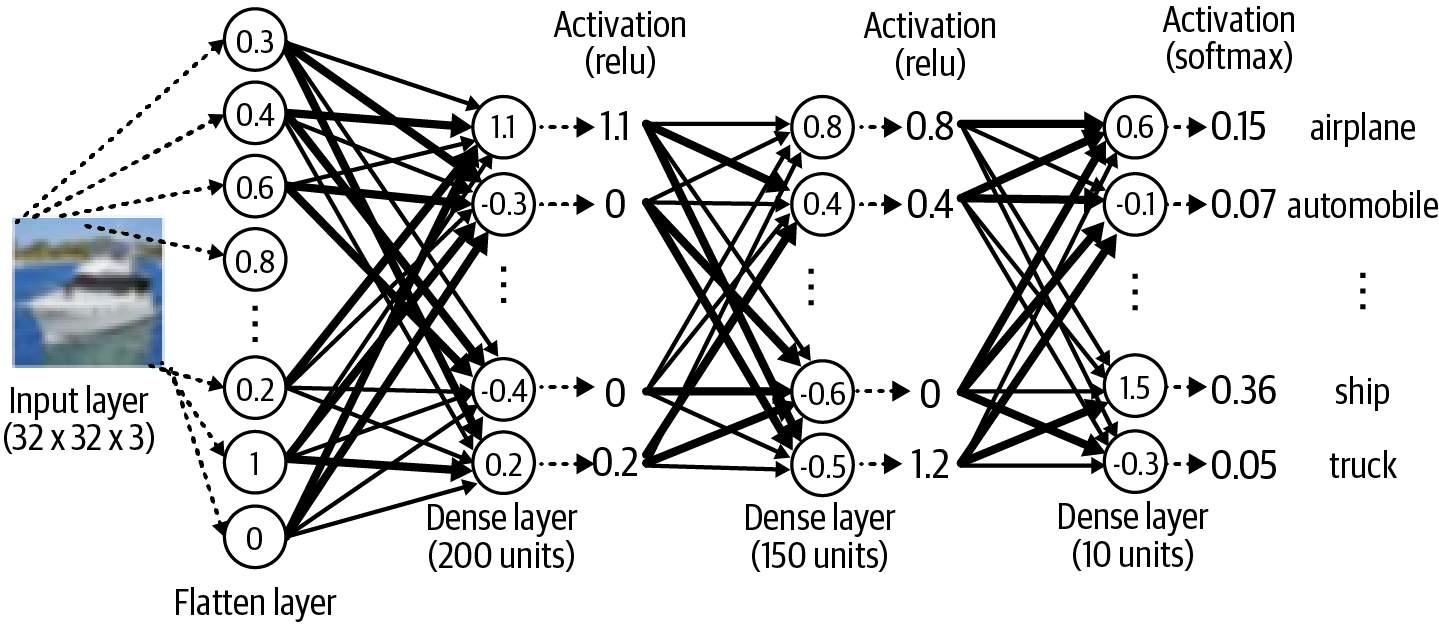


In [9]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 10)


In [10]:
# Sequential - a linear stack of layers

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(200, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#  functional API

from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation = 'relu')(x) 
# The number of parameters in the 200-unit Dense layer is 200 * (3,072 + 1) = 614,600.
x = layers.Dense(units=150, activation = 'relu')(x)
output_layer = layers.Dense(units=10, activation = 'softmax')(x)
model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The Input layer is an entry point into the network. We tell the network the shape of each data element to expect as a tuple. Notice that we do not specify the batch size; this isn’t necessary as we can pass any number of images into the Input layer simultaneously.

Suppose you have a dataset of 1,000 images, and you're training a neural network to classify these images into different categories. If you choose a batch size of 32, it means that during each iteration of the training process, the model will process 32 images before updating its weights.

> **Stochastic Gradient Descent (Batch Size = 1):**

In each iteration, the model processes and updates weights based on the prediction and the correct label of a single randomly chosen image from the dataset. The model's parameters are adjusted more frequently but with higher variance.

> **Mini-Batch Gradient Descent (Batch Size = 32):**

In each iteration, the model processes and updates weights based on predictions and labels for 32 randomly chosen images. The model's parameters are adjusted less frequently compared to stochastic gradient descent, but with less variance than batch gradient descent.

> **Batch Gradient Descent (Batch Size = Size of Dataset):**

In each iteration, the model processes and updates weights based on predictions and labels for the entire dataset. The model's parameters are adjusted once per epoch (complete pass through the dataset), resulting in a smoother but less frequent update.

The shape of our Input layer (None, 32, 32, 3) matches the shape of x_train (50000, 32, 32, 3) and the shape of our Dense output layer (None, 10) matches the shape of y_train (50000, 10)  

Keras uses **None** as a marker for the first dimension to show that it doesn’t yet know the number of observations that will be passed into the network. In fact, it doesn’t need to; we could just as easily pass 1 observation through the network at a time as 1,000. That’s because tensor operations are conducted across all observations simultaneously using linear algebra—this is the part handled by TensorFlow

## Loss Function

On a binary classification problem with one output unit, or a multilabel problem where each observation can belong to multiple classes simultaneously, 
the loss function used is binary cross-entropy.

### Formula:

For a single sample, the binary cross-entropy loss is computed as follows:

$ L(y, \hat{y}) = -[y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})] $

Here:
- $y$ is the true binary label (0 or 1),
- $\hat{y}$ is the predicted probability of the sample belonging to class 1.

### Explanation:

- When $y = 1$ (positive class), the loss becomes $-\log(\hat{y})$, penalizing the model more as the predicted probability $\hat{y}$ approaches 0.

- When $y = 0$ (negative class), the loss becomes $-\log(1 - \hat{y})$, penalizing the model more as the predicted probability $\hat{y}$ approaches 1.

For a dataset with multiple samples, the binary cross-entropy loss is averaged over all samples:

$L(Y, \hat{Y}) = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)]$

Here:
- $Y$ is the vector of true binary labels for all samples,
- $\hat{Y}$ is the vector of predicted probabilities for all samples,
- $N$ is the number of samples.


## Optimizers

The optimizer is the algorithm that will be used to update the weights in the neural network based on the gradient of the loss function

The most commonly used and stable optimizers is
**Adam (Adaptive Moment Estimation)** and **RMSProp (Root Mean Squared Propagation)**

In [12]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

In [13]:
# Training our MODEL
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8448 - accuracy: 0.3353
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6584 - accuracy: 0.4079
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5860 - accuracy: 0.4323
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5325 - accuracy: 0.4522
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4945 - accuracy: 0.4683
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4667 - accuracy: 0.4751
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4375 - accuracy: 0.4877
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4097 - accuracy: 0.5000
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3895 - accuracy: 0.5066
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

The epochs determine how many times the network will be shown the full training data

It would be far too time-consuming and computationally intensive to use the entire dataset to calculate the gradient at each training step, so generally a batch size between 32 and 256 is used. 

It is also now recommended practice to increase the batch size as training progresses.

In the exmaple each epoch involves processing 1563 batches of data ( $ \frac{50000}{32} \approx 1562.5 $ )  before completing one full pass through the training dataset.

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4330 - accuracy: 0.4911


[1.432986855506897, 0.491100013256073]

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) # [10000, 10]
preds_single = CLASSES[np.argmax(preds, axis = -1)] # [10000, 1]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 2ms/step


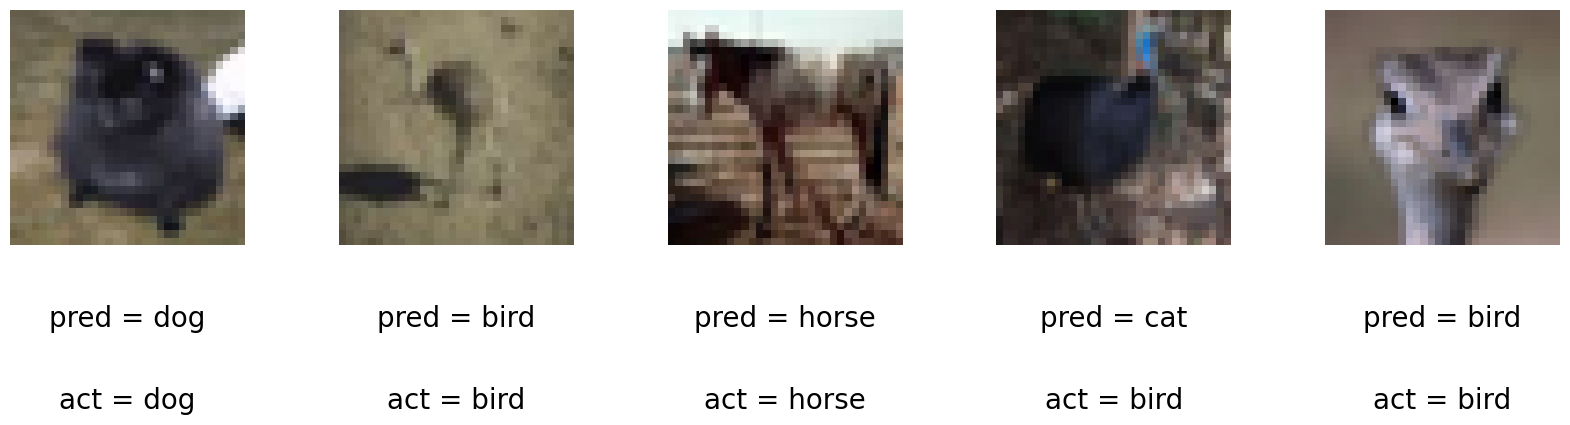

In [28]:
import matplotlib.pyplot as plt
import numpy as np

n_to_show = 5
indices = np.random.choice(range(len(x_test)), n_to_show)

# Increase the figsize parameter to make the figure bigger
fig = plt.figure(figsize=(20, 40))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=20
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=20
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.show()

In [37]:
# Function to display test images after training

import matplotlib.pyplot as plt
import numpy as np

def plot_random_images(model, x_test, y_test, n_to_show=5, figsize=(20, 40)):
    classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
    preds = model.predict(x_test)
    preds_single = classes[np.argmax(preds, axis=-1)]
    actual_single = classes[np.argmax(y_test, axis=-1)]

    indices = np.random.choice(range(len(x_test)), n_to_show)

    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, idx in enumerate(indices):
        img = x_test[idx]
        ax = fig.add_subplot(1, n_to_show, i+1)
        ax.axis('off')
        ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=20
               , ha='center', transform=ax.transAxes)
        ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=20
               , ha='center', transform=ax.transAxes)
        ax.imshow(img)
    plt.show()


One of the reasons our network isn’t yet performing as well as it might is because there isn’t anything in the network that takes into account the ***spatial structure*** of the input images.

In the above model our first step is to flatten the image into a single vector, so that we can pass it to the first Dense layer.

## Convolutional Layers

### Filter (or kernel)

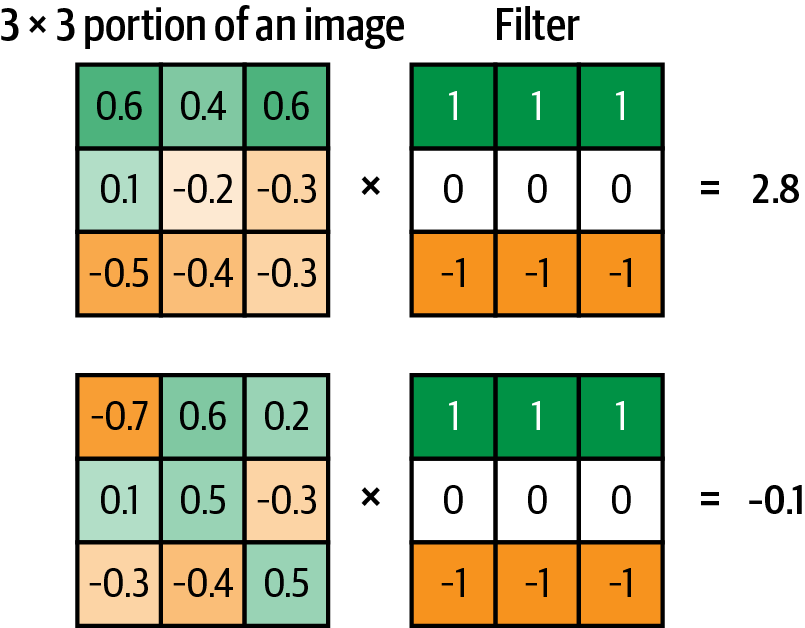

The output is more positive when the portion of the image closely matches the filter and more negative when the portion of the image is the inverse of the filter.


A convolutional layer is simply a collection of filters, where the values stored in the filters are the weights that are learned by the neural network through training. Initially these are random, but gradually the filters adapt their weights to start picking out interesting features such as edges or particular color combinations.

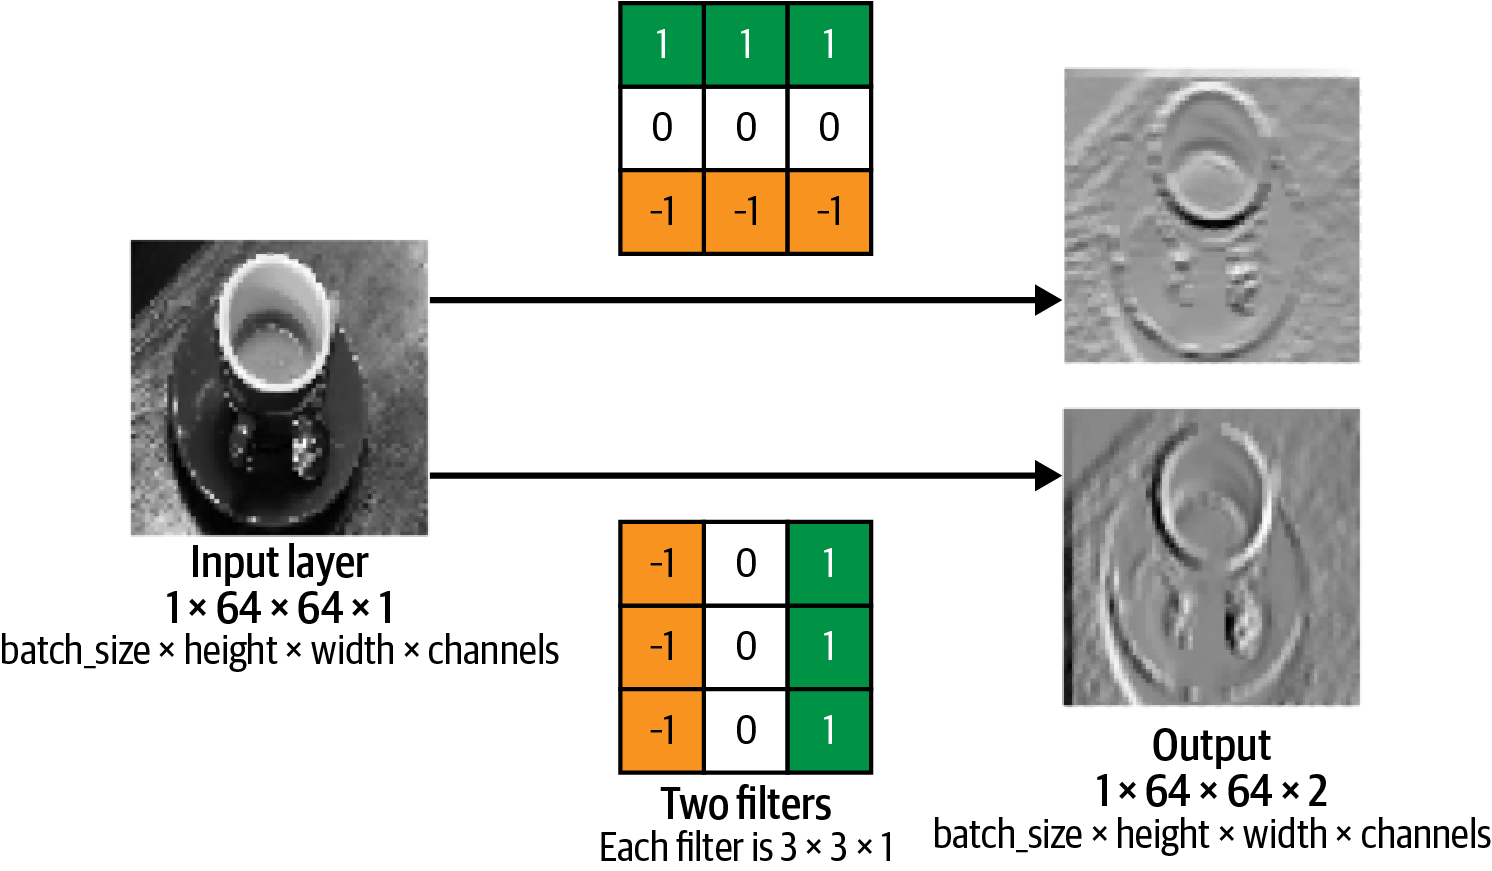

In [30]:
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(32,32,3))
# The output of a Conv2D layer is another four-dimensional tensor,
# of shape (batch_size, height, width, filters)
conv_layer_1 = layers.Conv2D(
    filters = 10, kernel_size = (4,4), strides = 2, padding = 'same'
    )(input_layer)
#The number of parameters (or weights) in the layer is (4 × 4 × 3 + 1) × 10 = 490
conv_layer_2 = layers.Conv2D(
    filters = 20, kernel_size = (3,3), strides = 2, padding = 'same'
    )(conv_layer_1)
# Total number of parameters (weights) of (3 × 3 × 10 + 1) × 20 = 1,820
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units=10, activation = 'softmax')(flatten_layer)
model = models.Model(input_layer, output_layer)

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 10)        490       
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15120 (59.06 KB)
Trainable params: 15120 (59.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In general, the depth of the filters in a layer is always equal to the number of channels output by the preceding layer.


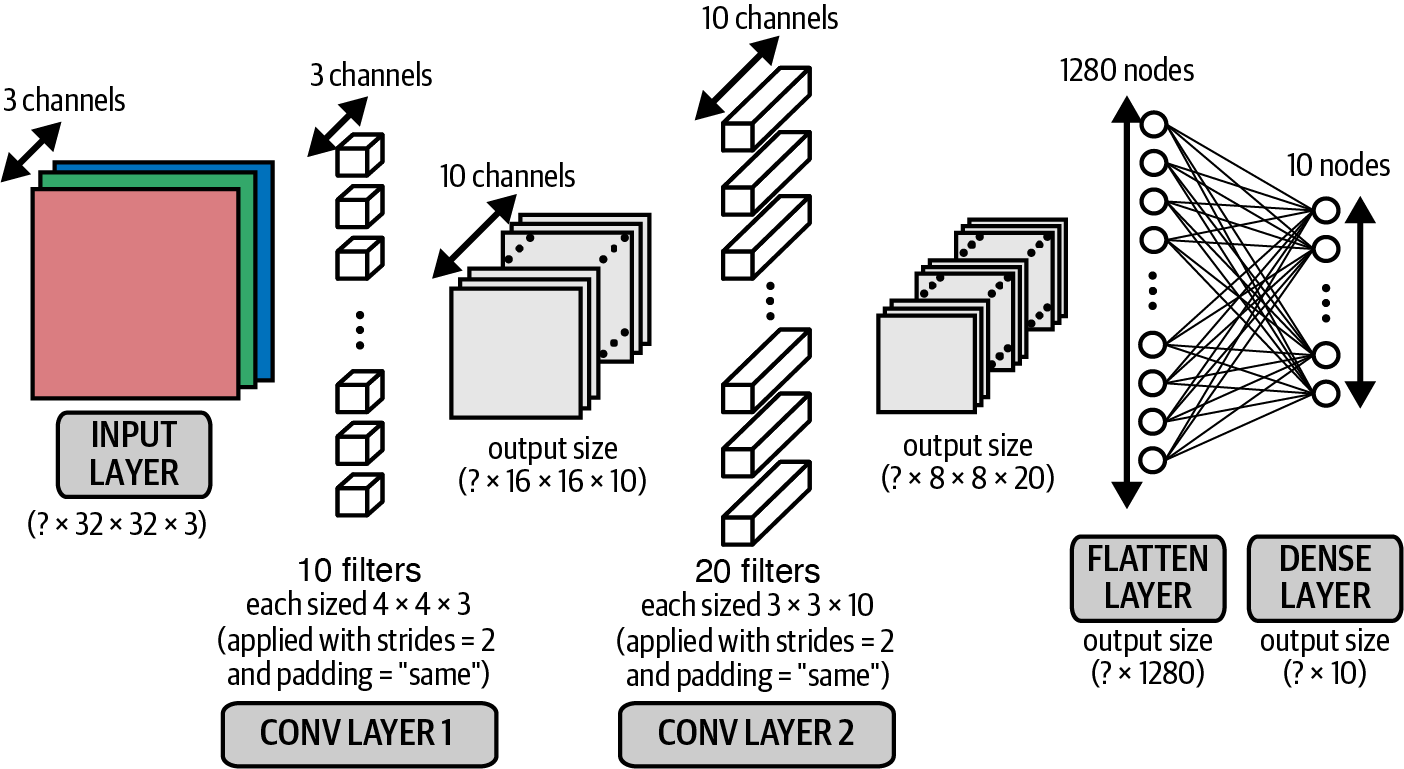

In [34]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

model.evaluate(x_test, y_test, batch_size=1000)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8554 - accuracy: 0.3510 - val_loss: 1.7409 - val_accuracy: 0.4009
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7362 - accuracy: 0.4053 - val_loss: 1.7265 - val_accuracy: 0.4028
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7159 - accuracy: 0.4127 - val_loss: 1.7193 - val_accuracy: 0.4079
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7066 - accuracy: 0.4183 - val_loss: 1.7122 - val_accuracy: 0.4132
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6975 - accuracy: 0.4205 - val_loss: 1.7134 - val_accuracy: 0.4097
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6902 - accuracy: 0.4231 - val_loss: 1.7154 - val_accuracy: 0.4114
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6855 - accuracy: 0.4263 - val_loss: 1.7176 - val_ac

[1.7291046380996704, 0.40459999442100525]

313/313 [==============================] - 1s 3ms/step


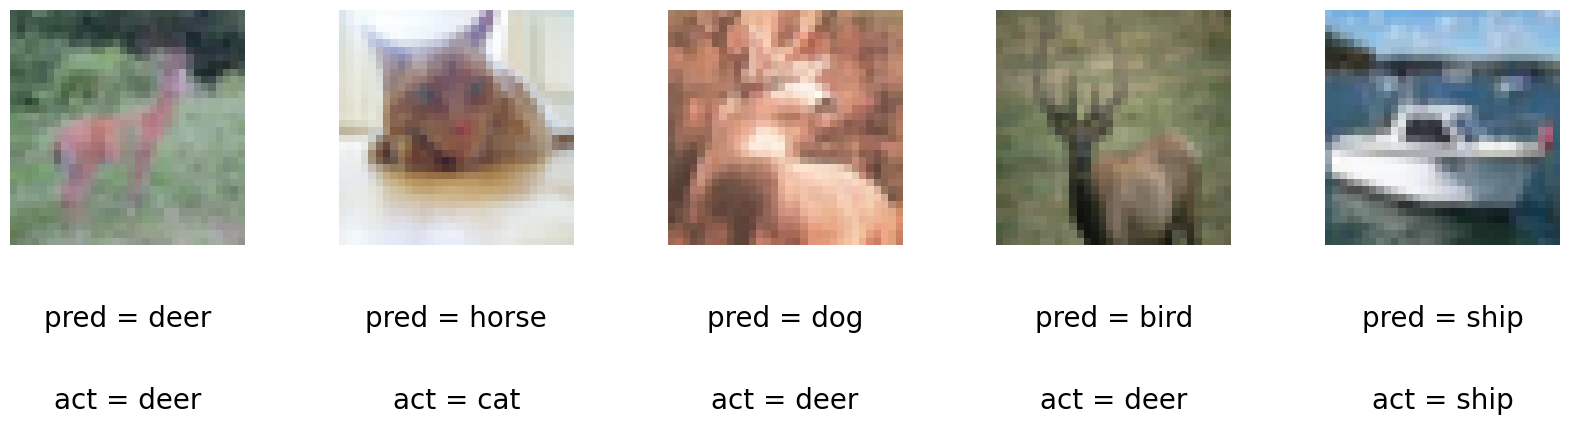

In [35]:
plot_random_images(model, x_test, y_test, n_to_show=5, figsize=(20, 40))

## BatchNormalization and Dropout

Exploding gradient problem - As errors are propagated backward through the network, the calculation of the gradient in the earlier layers can sometimes grow exponentially large, causing wild fluctuations in the weight values.

**Batch normalization** is a technique that drastically reduces this.

During training, a batch normalization layer calculates the mean and standard deviation of each of its input channels across the batch and normalizes by subtracting the mean and dividing by the standard deviation. 

***There are then two learned parameters for each channel***, the scale (gamma) and shift (beta). The output is simply the normalized input, scaled by gamma and shifted by beta.

For every channel in the preceding layer, two weights need to be learned: the scale (gamma) and shift (beta). These are the trainable parameters. The moving average and standard deviation also need to be calculated for each channel, but since they are derived from the data passing through the layer rather than trained through backpropagation, they are called nontrainable parameters. 

We can place batch normalization layers after dense or convolutional layers to normalize the output.

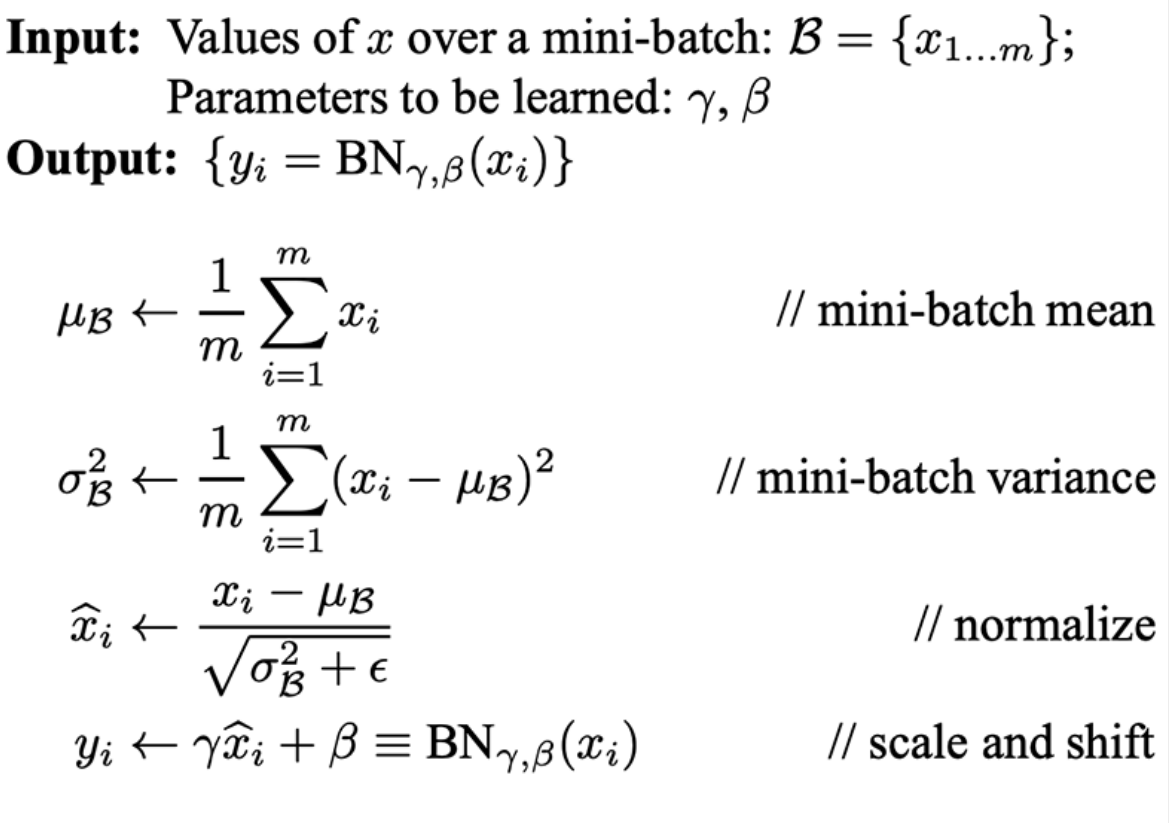

When it comes to prediction, we want to predict a single observation, so there is no batch over which to calculate the mean and standard deviation.

To get around this problem, during training a batch normalization layer also calculates the moving average of the mean and standard deviation of each channel and stores this value as part of the layer to use at test time.


**Dropout layers**

During training, each dropout layer chooses a random set of units from the preceding layer and sets their output to 0

If we use dropout layers, the network cannot rely too much on any one unit and therefore knowledge is more evenly spread across the whole network.

There are no weights to learn within a dropout layer, as the units to drop are decided stochastically.

At prediction time, the dropout layer doesn’t drop any units, so that the full network is used to make predictions.

Dropout layers are used most commonly after dense layers since these are the most prone to overfitting due to the higher number of weights

In [41]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                          

In [44]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True   
)

Epoch 1/10
1563/1563 [==============================] - 93s 58ms/step - loss: 1.4052 - accuracy: 0.5013
Epoch 2/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.1277 - accuracy: 0.6039
Epoch 3/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.9906 - accuracy: 0.6519
Epoch 4/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.9090 - accuracy: 0.6810
Epoch 5/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8397 - accuracy: 0.7047
Epoch 6/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.7898 - accuracy: 0.7243
Epoch 7/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.7477 - accuracy: 0.7375
Epoch 8/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7104 - accuracy: 0.7507
Epoch 9/10
1563/1563 [==============================] - 91s 59ms/step - loss: 0.6748 - accuracy: 0.7659
Epoch 10/10
1563/1563 [==============================] - 93s 59m

In [45]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 5s 493ms/step - loss: 0.8117 - accuracy: 0.7261


[0.8116946816444397, 0.7261000275611877]

313/313 [==============================] - 5s 17ms/step


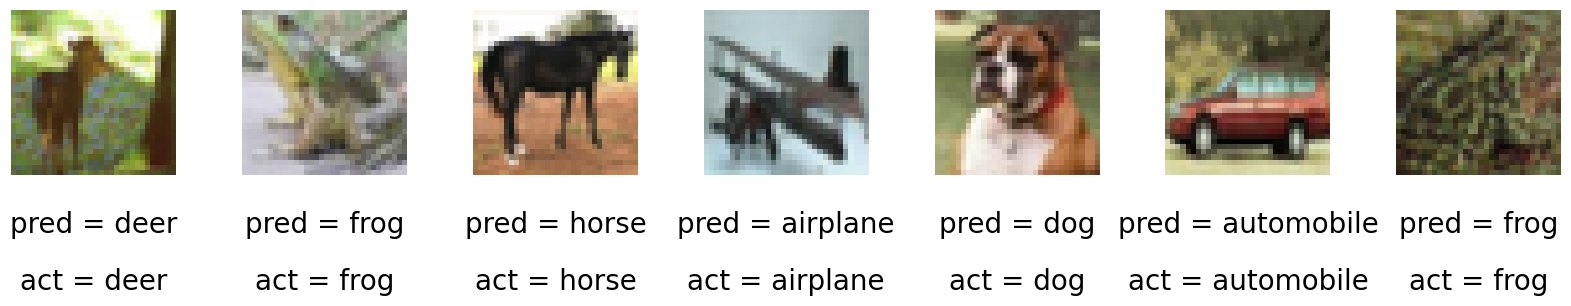

In [53]:
plot_random_images(model, x_test, y_test, n_to_show=7, figsize=(20, 40))

#### Convolutional filters on different aspects of an image

(64, 64)


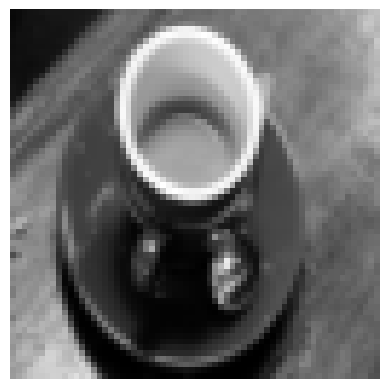

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

im = rgb2gray(data.coffee())
im = resize(im, (64, 64))
print(im.shape)

plt.axis("off")
plt.imshow(im, cmap="gray")

#### Horizontal Edge Filter

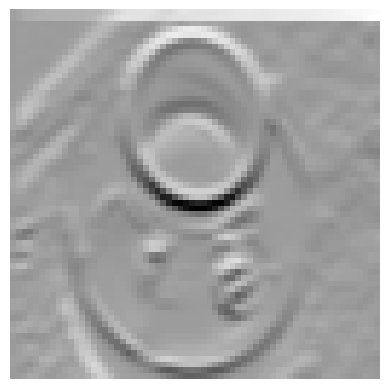

In [47]:
filter1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, "constant")

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i, j] = (
                im_pad[i - 1, j - 1] * filter1[0, 0]
                + im_pad[i - 1, j] * filter1[0, 1]
                + im_pad[i - 1, j + 1] * filter1[0, 2]
                + im_pad[i, j - 1] * filter1[1, 0]
                + im_pad[i, j] * filter1[1, 1]
                + im_pad[i, j + 1] * filter1[1, 2]
                + im_pad[i + 1, j - 1] * filter1[2, 0]
                + im_pad[i + 1, j] * filter1[2, 1]
                + im_pad[i + 1, j + 1] * filter1[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

#### Vertical Edge Filter

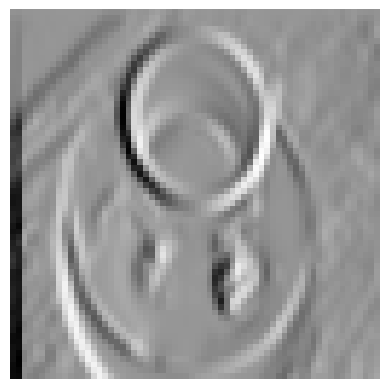

In [48]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, "constant")

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i, j] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

#### Horizontal Edge Filter with Stride 2

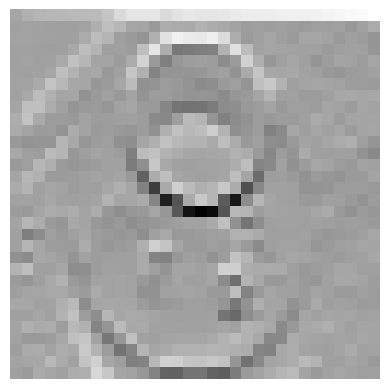

In [49]:
filter1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter1[0, 0]
                + im_pad[i - 1, j] * filter1[0, 1]
                + im_pad[i - 1, j + 1] * filter1[0, 2]
                + im_pad[i, j - 1] * filter1[1, 0]
                + im_pad[i, j] * filter1[1, 1]
                + im_pad[i, j + 1] * filter1[1, 2]
                + im_pad[i + 1, j - 1] * filter1[2, 0]
                + im_pad[i + 1, j] * filter1[2, 1]
                + im_pad[i + 1, j + 1] * filter1[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

#### Vertical Edge Filter with Stride 2

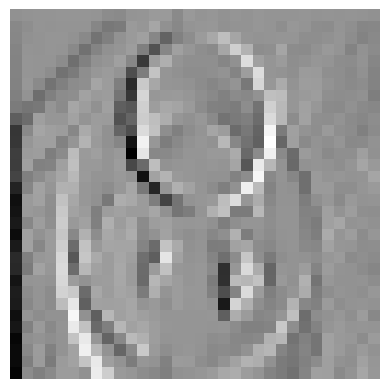

In [50]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")